<a href="https://colab.research.google.com/github/somyamangla/UberAnalysis/blob/main/uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time,datetime
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
df=pd.read_csv("/content/My Uber Drives - 2016.csv",encoding="latin1")

In [ ]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
df.columns=df.columns.str.replace("*","")

In [ ]:
df.tail()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
#handle missing values
df.isnull().sum()


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

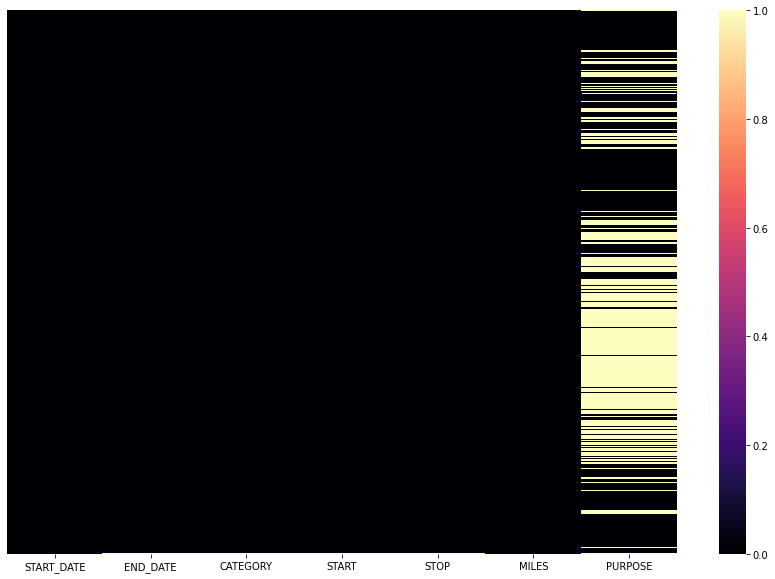

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [ ]:
!pip install missingno 

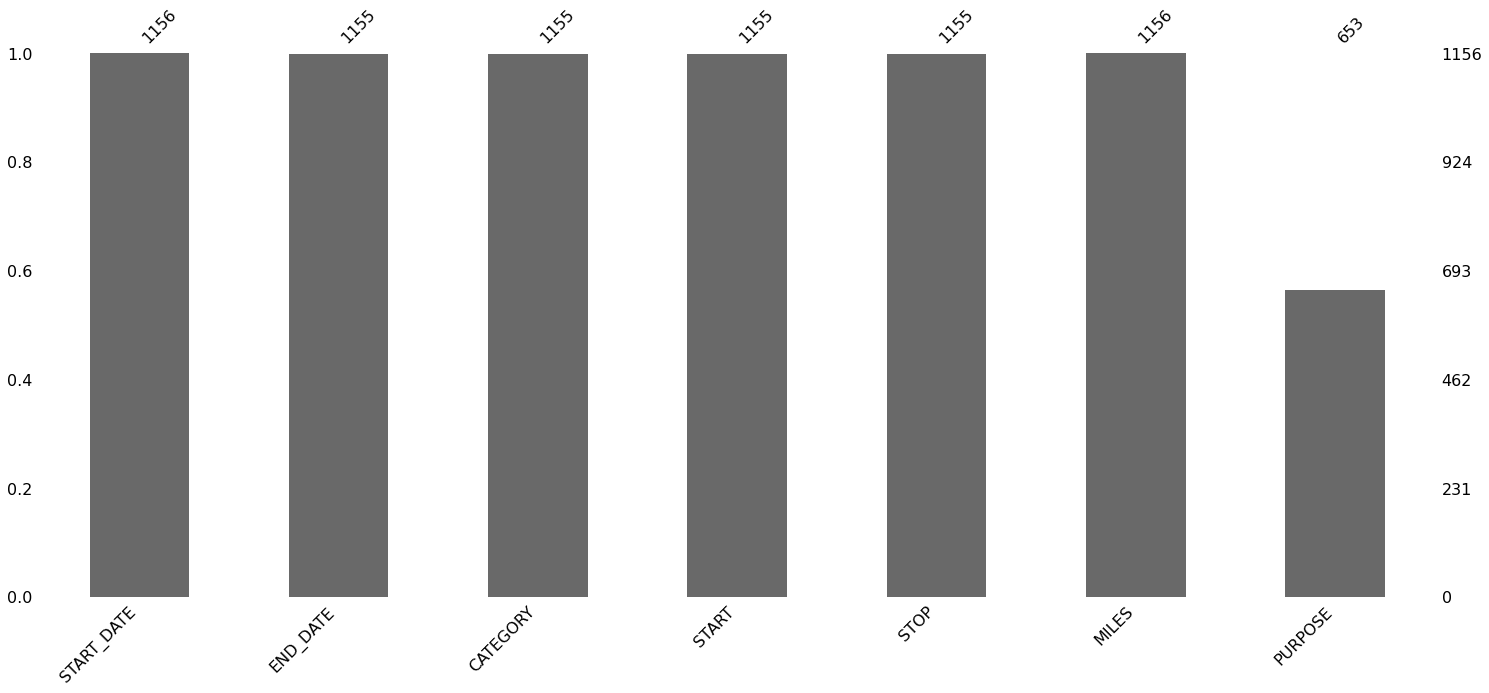

In [ ]:
import  missingno as msno
msno.bar(df)
plt.show()

In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [ ]:
df.drop(index=1155,axis=0,inplace=True)

In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [ ]:
df["PURPOSE"].fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [ ]:
df["START_DATE"]=pd.to_datetime(df["START_DATE"],errors='coerce')
df["END_DATE"]=pd.to_datetime(df["END_DATE"],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


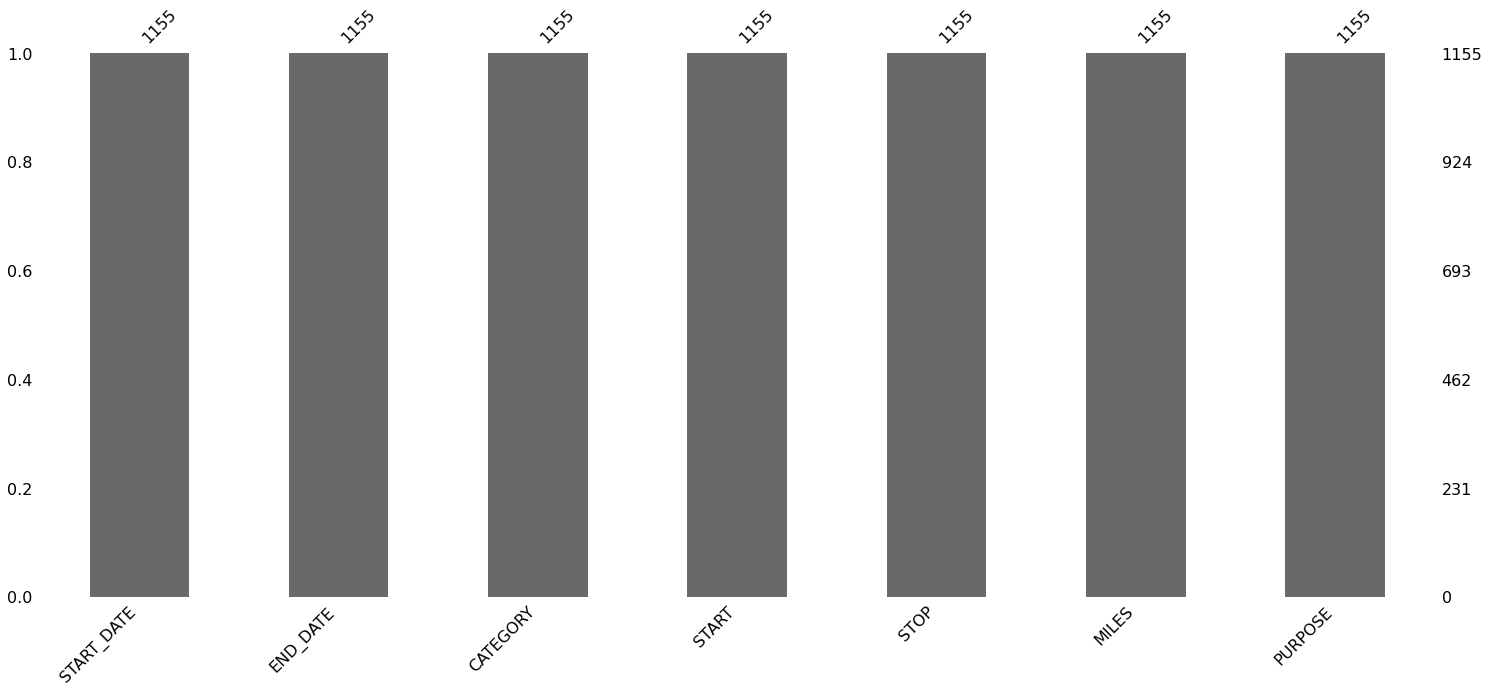

In [ ]:
import  missingno as msno
msno.bar(df)
plt.show()

In [ ]:
category=pd.crosstab(index=df['CATEGORY'],columns='count of travel per categoty')
category

col_0,count of travel per categoty
CATEGORY,
Business,1078
Personal,77


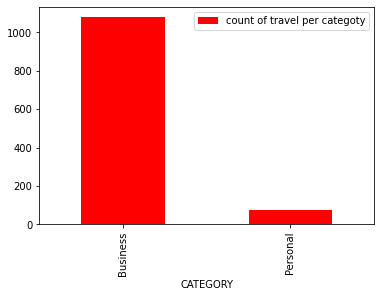

In [ ]:
category.plot(kind='bar',color='r')
plt.legend()

In [ ]:
start_point=df.START.value_counts()
start_point
print(start_point[start_point>10])


Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
Kissimmee            11
Kenner               11
R?walpindi           11
Name: START, dtype: int64


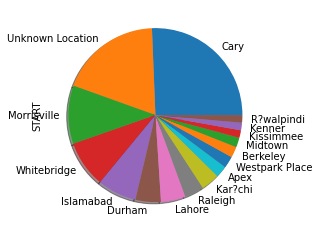

In [ ]:
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

In [ ]:
print(start_point[start_point<=10])

New Orleans           10
Emeryville            10
Downtown               9
Orlando                8
San Francisco          8
                      ..
Ingleside              1
Sand Lake Commons      1
Red River District     1
Latta                  1
Sunnyvale              1
Name: START, Length: 161, dtype: int64


In [ ]:
stop_point=df.STOP.value_counts()
stop_point
print(stop_point[stop_point>10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Westpark Place       16
Berkeley             16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64


In [ ]:
print(stop_point[stop_point<=10])

Edgehill Farms               10
Kenner                       10
New Orleans                  10
Emeryville                    9
Central                       9
                             ..
Lower Garden District         1
Vista East                    1
Arlington Park at Amberly     1
Tribeca                       1
Sunnyvale                     1
Name: STOP, Length: 173, dtype: int64


In [ ]:
miles=df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [ ]:
print(miles[miles>10])

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64


In [ ]:
print(miles[miles<10])

2.4      9
1.2      9
2.6      9
3.2      9
4.1      9
        ..
310.3    1
11.1     1
10.7     1
195.6    1
22.7     1
Name: MILES, Length: 221, dtype: int64


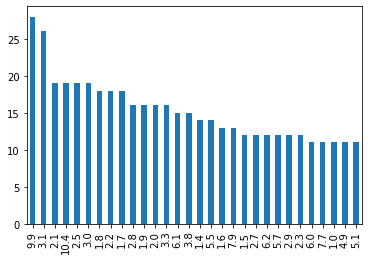

In [ ]:
miles[miles>10].plot(kind='bar')

col_0,count of miles
MILES,
False,840
True,315


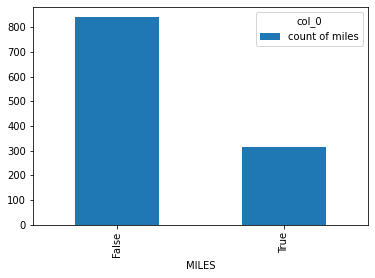

In [ ]:
miles=pd.crosstab(index=df["MILES"]>10,columns="count of miles")
miles.plot(kind='bar')
miles

In [ ]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64


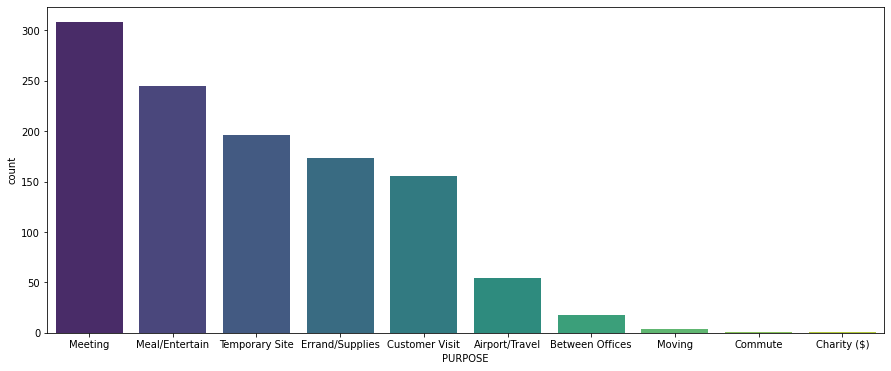

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order=df["PURPOSE"].value_counts().index,palette='viridis')

In [ ]:
df['MINUTES']=df["END_DATE"]-df["START_DATE"]
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   START_DATE  1155 non-null   datetime64[ns] 
 1   END_DATE    1155 non-null   datetime64[ns] 
 2   CATEGORY    1155 non-null   object         
 3   START       1155 non-null   object         
 4   STOP        1155 non-null   object         
 5   MILES       1155 non-null   float64        
 6   PURPOSE     1155 non-null   object         
 7   MINUTES     1155 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 121.2+ KB


In [ ]:
df['MINUTES'] = df['MINUTES'].dt.total_seconds()/60

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [ ]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean(),
             'Min':df.groupby(['PURPOSE'])['MILES'].mean(),
              'Max':df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,14.953704,14.953704,156.9
1,Between Offices,10.944444,10.944444,39.2
2,Charity ($),15.100000,15.100000,15.1
3,Commute,180.200000,180.200000,180.2
4,Customer Visit,16.065806,16.065806,310.3
5,Errand/Supplies,5.928902,5.928902,195.3
6,Meal/Entertain,5.773878,5.773878,36.5
7,Meeting,12.652597,12.652597,201.0
8,Moving,4.550000,4.550000,6.1
9,Temporary Site,11.016327,11.016327,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

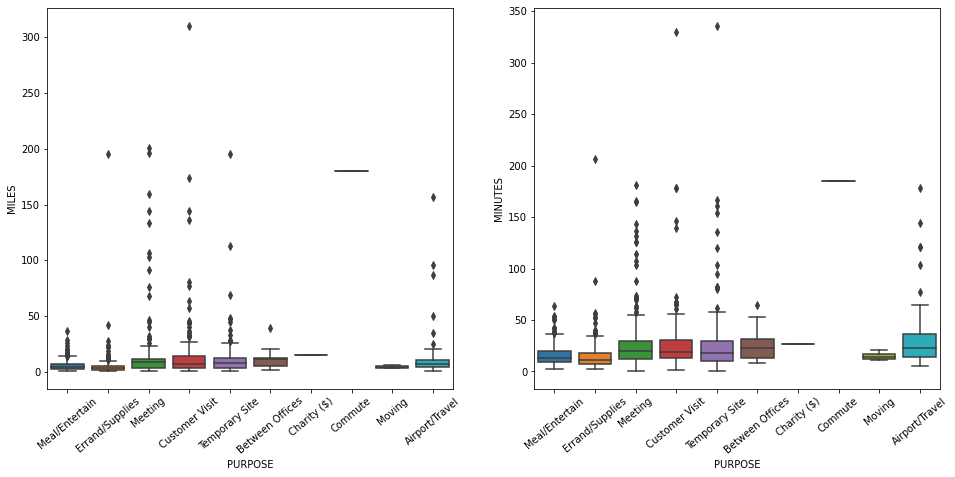

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MILES'])
plt.xticks(rotation=40)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MINUTES'])
plt.xticks(rotation=40)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

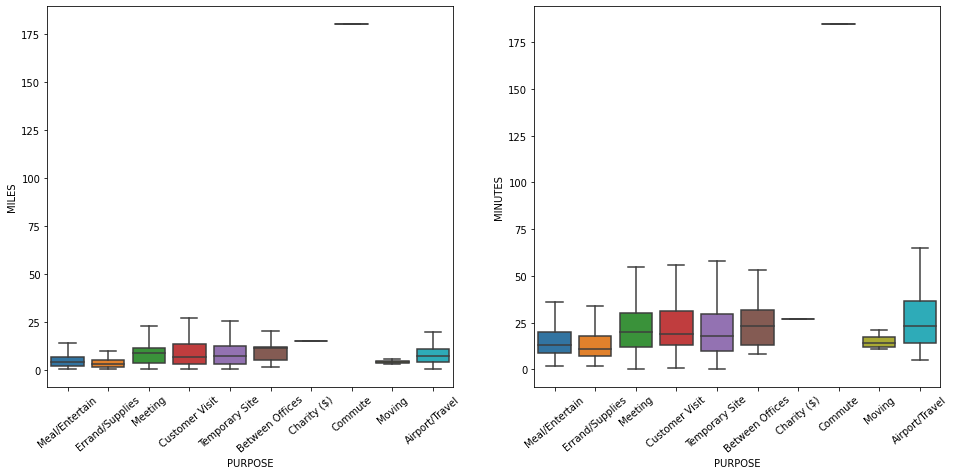

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MILES'],showfliers=False)
plt.xticks(rotation=40)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MINUTES'],showfliers=False)
plt.xticks(rotation=40)

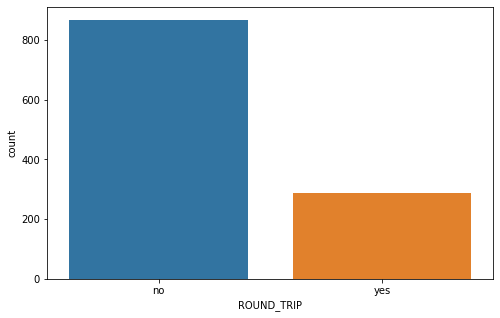

In [ ]:
plt.figure(figsize=(8,5))
def round(x):
  if x['START']==x['STOP']:
    return 'yes'
  else:
    return 'no'
df['ROUND_TRIP']=df.apply(round,axis=1)
sns.countplot(df['ROUND_TRIP'],order =df['ROUND_TRIP'].value_counts().index)

In [ ]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month


In [ ]:
dic={1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
df['MONTH']=df['MONTH'].map(dic)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan


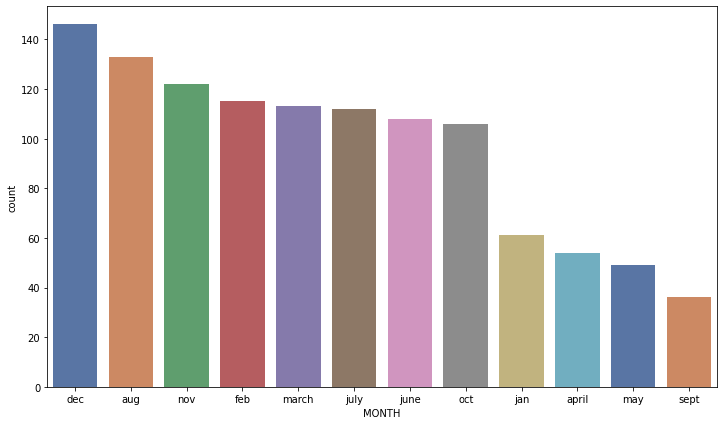

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'],order=df['MONTH'].value_counts().index,palette='deep')

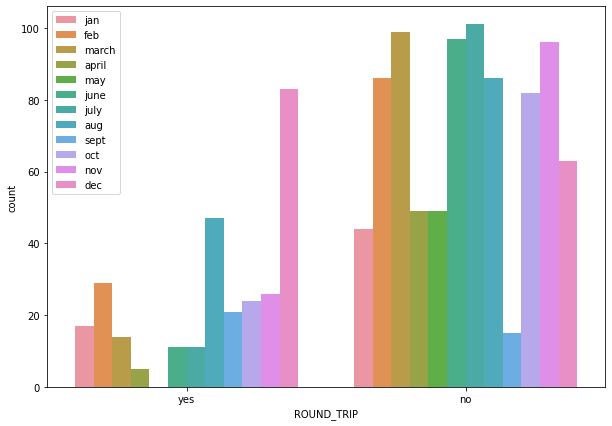

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df['ROUND_TRIP'],hue=df['MONTH'])
plt.legend()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

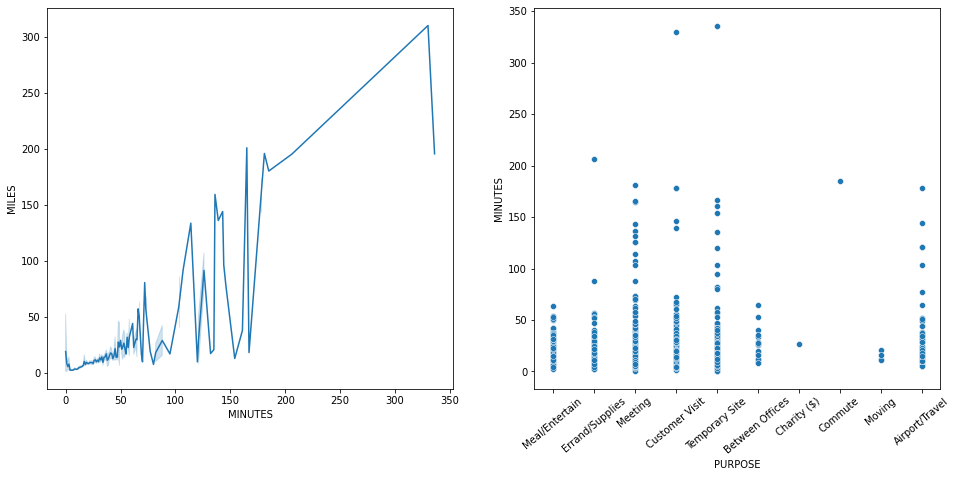

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df['MINUTES'],y=df['MILES'])

plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['PURPOSE'],y=df['MINUTES'])
plt.xticks(rotation=40)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

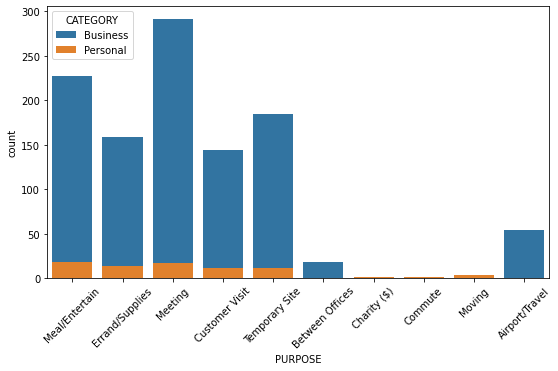

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

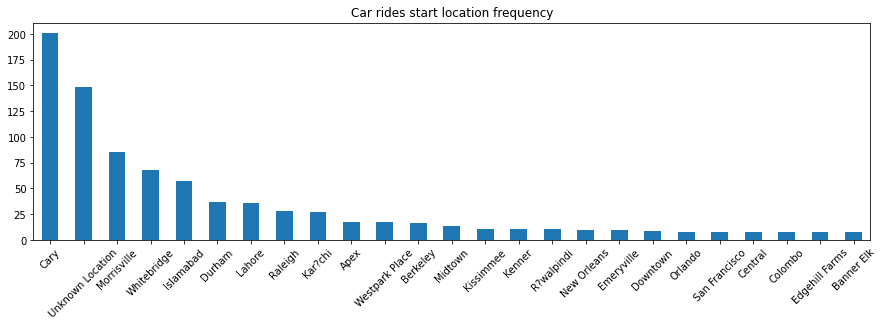

In [ ]:
plt.figure(figsize=(15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('Car rides start location frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

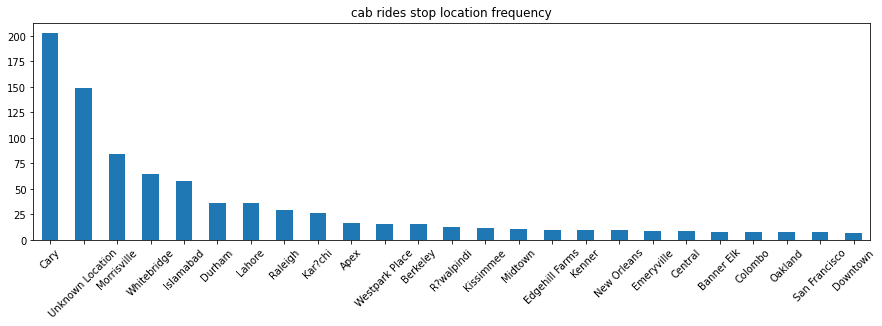

In [ ]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title('cab rides stop location frequency')
plt.xticks(rotation=45)